In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Reading the data from an csv file and make the copy of it and showingh the first 5 rows

In [2]:
reading_data = pd.read_csv("C:/Users/Lenovo/Downloads/Car Selling Price.csv")

In [ ]:
df = reading_data.copy()
df.head()

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4 kmpl,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14 kmpl,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7 kmpl,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0 kmpl,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1 kmpl,120000,First Owner,Individual,130000


cleaning data

In [4]:
df.duplicated().sum()

1202

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(6926, 13)

In [7]:
df.isna().sum()

Brand              0
Year               0
Fuel               0
Transmission       0
Engine           208
Max_Power        205
Torque           209
Seats            208
Mileage          208
KM_Driven          0
Owner              0
Seller_Type        0
Selling_Price      0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(6717, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   object 
 5   Max_Power      6717 non-null   object 
 6   Torque         6717 non-null   object 
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   object 
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


In [11]:
df_1 = df.copy()

we have a three columns that we want to extract the int number from it

In [37]:
df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
df_1['Torque'] = df['Torque'].str.extract('(\d+)').astype('Int64')


df_1.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22648\2747211242.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_1['Engine'] = df['Engine'].str.extract('(\d+)').astype('Int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22648\2747211242.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_1['Mileage'] = df['Mileage'].str.extract('(\d+)').astype('Int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22648\2747211242.py:3: SyntaxWarning: invalid escape sequence '\d'
  df_1['Max_Power'] = df['Max_Power'].str.extract('(\d+)').astype('Int64')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2264

,Brand,Year,Fuel,Transmission,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Owner,Seller_Type,Selling_Price
0,Maruti Swift Dzire VDI,2014,Diesel,Manual,1248,74,190,5.0,23,145500,First Owner,Individual,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,Diesel,Manual,1498,103,250,5.0,21,120000,Second Owner,Individual,370000
2,Honda City 2017-2020 EXi,2006,Petrol,Manual,1497,78,12,5.0,17,140000,Third Owner,Individual,158000
3,Hyundai i20 Sportz Diesel,2010,Diesel,Manual,1396,90,22,5.0,23,127000,First Owner,Individual,225000
4,Maruti Swift VXI BSIII,2007,Petrol,Manual,1298,88,11,5.0,16,120000,First Owner,Individual,130000


In [38]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6717 non-null   object 
 1   Year           6717 non-null   int64  
 2   Fuel           6717 non-null   object 
 3   Transmission   6717 non-null   object 
 4   Engine         6717 non-null   Int64  
 5   Max_Power      6717 non-null   Int64  
 6   Torque         6717 non-null   Int64  
 7   Seats          6717 non-null   float64
 8   Mileage        6717 non-null   Int64  
 9   KM_Driven      6717 non-null   int64  
 10  Owner          6717 non-null   object 
 11  Seller_Type    6717 non-null   object 
 12  Selling_Price  6717 non-null   int64  
dtypes: Int64(4), float64(1), int64(3), object(5)
memory usage: 760.9+ KB


here in engine column it transformed as int32

Data Preprocessing

In [39]:
numeric_columns = df_1.select_dtypes(include = ['int32','int64','float64']).columns
df_1_numeric = df_1[numeric_columns]

In [40]:
df_1_numeric.head()

,Year,Engine,Max_Power,Torque,Seats,Mileage,KM_Driven,Selling_Price
0,2014,1248,74,190,5.0,23,145500,450000
1,2014,1498,103,250,5.0,21,120000,370000
2,2006,1497,78,12,5.0,17,140000,158000
3,2010,1396,90,22,5.0,23,127000,225000
4,2007,1298,88,11,5.0,16,120000,130000


In [41]:
correlation= df_1_numeric.corr()
print(correlation["Selling_Price"].sort_values(ascending=False))

Selling_Price    1.000000
Max_Power        0.691873
Torque           0.616813
Engine           0.442772
Year             0.427335
Seats            0.158531
Mileage         -0.105434
KM_Driven       -0.161265
Name: Selling_Price, dtype: float64


<Axes: >

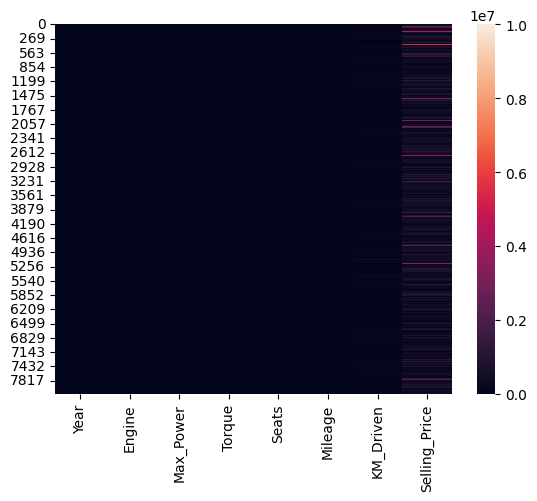

In [43]:
# Convert Int64 columns to float64 for compatibility with sns.heatmap
df_1_numeric_fixed = df_1_numeric.astype('float64')

sns.heatmap(df_1_numeric_fixed)

We need to apply pie chart on the the type of Transmission

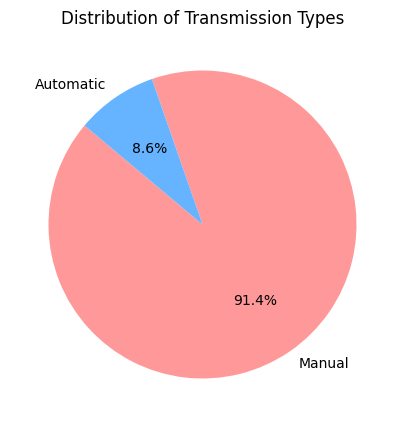

In [44]:
transmission_counts = df_1['Transmission'].value_counts()


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  


plt.figure(figsize=(5, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Transmission Types')
plt.show()

we need to show the average price on each of year using scatter plot

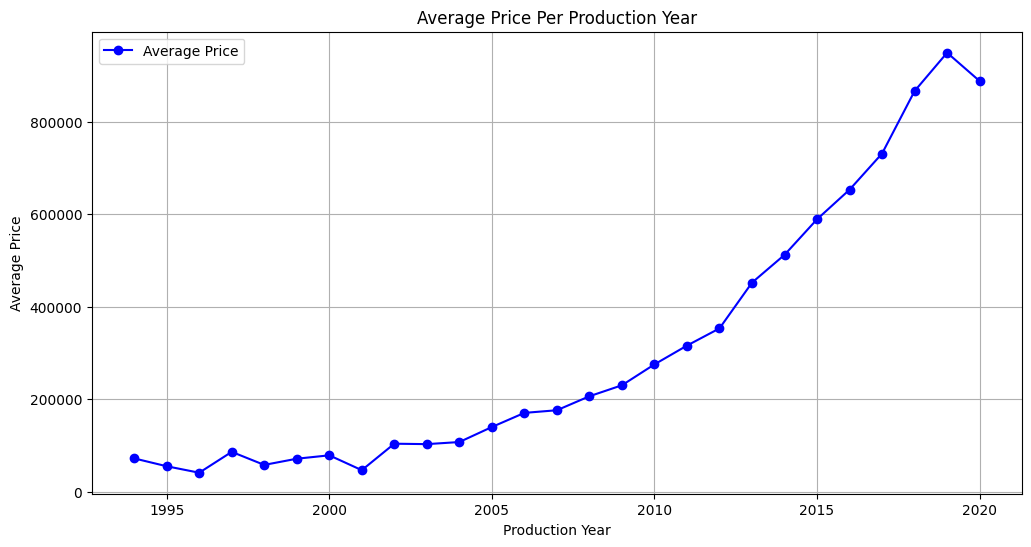

In [45]:
average_price_per_year = df_1.groupby('Year', as_index=False)['Selling_Price'].mean()


plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Selling_Price'], marker='o', color='blue', label='Average Price')


plt.xlabel('Production Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Production Year')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
df_1.columns

Index(['Brand', 'Year', 'Fuel', 'Transmission', 'Engine', 'Max_Power',
       'Torque', 'Seats', 'Mileage', 'KM_Driven', 'Owner', 'Seller_Type',
       'Selling_Price'],
      dtype='object')

Showing the most buying cars

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22648\3819442796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_brand,palette='coolwarm')


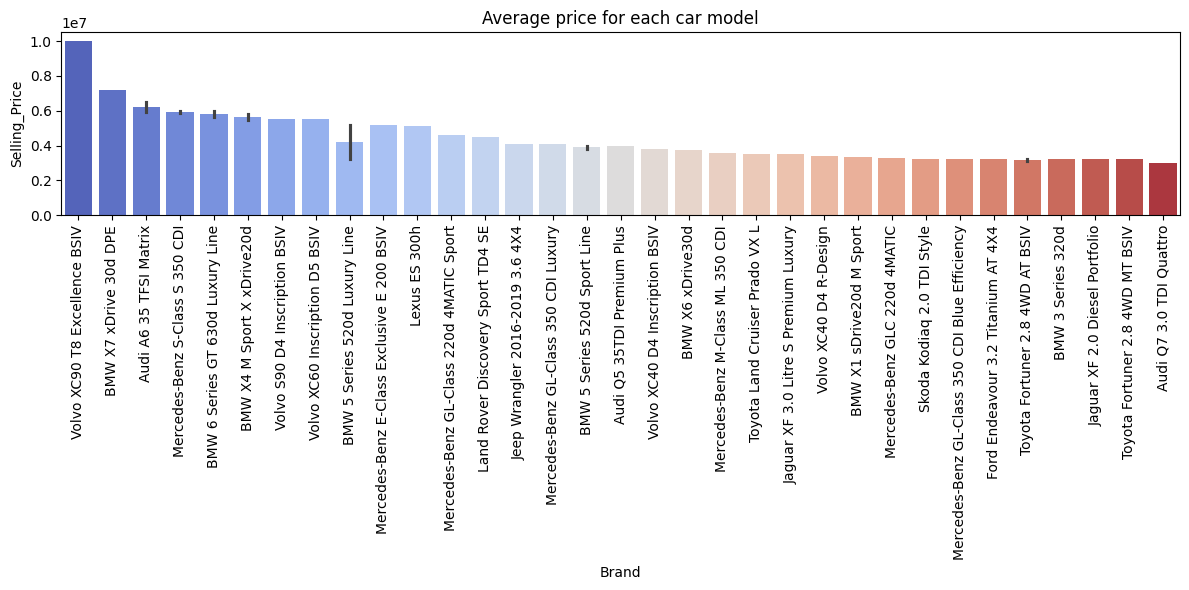

In [47]:
Most_price_brand = df_1.sort_values(by = 'Selling_Price', ascending=False).head(50)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Brand',y = 'Selling_Price',data = Most_price_brand,palette='coolwarm')
plt.xticks(rotation = 90)
plt.title('Average price for each car model')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [48]:
df_1['Brand'].unique

<bound method Series.unique of 0                  Maruti Swift Dzire VDI
1            Skoda Rapid 1.5 TDI Ambition
2                Honda City 2017-2020 EXi
3               Hyundai i20 Sportz Diesel
4                  Maruti Swift VXI BSIII
                      ...                
8121    Maruti Wagon R VXI BS IV with ABS
8122           Hyundai i20 Magna 1.4 CRDi
8123                    Hyundai i20 Magna
8124                Hyundai Verna CRDi SX
8125               Maruti Swift Dzire ZDi
Name: Brand, Length: 6717, dtype: object>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22648\1069759022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=df_1, palette='Set1')


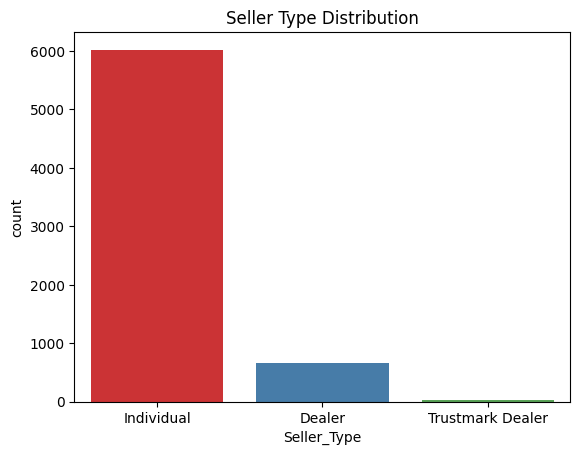

In [60]:
sns.countplot(x='Seller_Type', data=df_1, palette='Set1')
plt.title('Seller Type Distribution')
plt.show()


In [58]:
print(df_1['Torque'].loc[10])

248
